# MA 755 - Assignment 1

by Neha, Katrina, Chengdong

## **1. Get the data**
    1. Set up the working directory
    2. Download and unzip the data file
    3. Take a quick look at the data structure
    4. Create a train set and a test set
  
## **2. Data discovery and visualisation**
    1. Scatter plot, box plot and histogram
    2. Examine the correlation
    3. Try attribute combinations

## **3. Prepare the data for Machine Learning algorithms**
    1. Data cleaning
    2. Handling text and categorical attributes
    3. Custom transformers
    4. Feature scaling
    5. Transformation pipelines
  
## **4. Select and train a model**
    1. Training and evaluating on the training set
    2. Cross Validation

## **5. Fine-tune the model**
    1. Grid search
    2. Analyze the best models and their errors
    3. Evaluate the model on the test set
  

## 1. Get the data

### *1.1. Set up the working directory *

The first step is to create a workspace. We import the `os` module. Next we us the `getcwd` method to return a string representing the current working directory. Then we use the `chdir` method to change the current working directory to path mentioned. Finally we confirm if our working directory is set to the one specified by calling `getcwd` metod again.

In [1]:
import os
os.getcwd() 
os.chdir(C:\\Users\\Chengdong Liang\\Desktop\\MA 755\\Assignment 1)
os.getcwd()

'C:\\Users\\katri\\Desktop\\MA755\\Assignment\\Assignment1'

The above output tell us that our current working directory is "C:\\Users\\katri\\Desktop\\MA755\\Assignment\\Assignment1"

###  *1.2. Download and unzip the data file*

We import the `os` and `zipfile` modules to fetch our data which is in the form of a zipped file. Next we import the `urllib` module that is used to fetch URLs. `COLLEGE_URL` represents the URL for our data. `COLLEGE_PATH` is the directory created in our working space to download and save the dataset.

* `fetch_college_data` function has two parameters : `college_url` for the url of our dataset and `college_path` for the path in our working space where the data should be downloaded and saved.
* `makedirs` method is used to create the `datatsets/college` directory and setting `exist_ok` to True tells Python to not raise an error if the directory already exists.
* `os.path.join` method combines the name of the directory where the data is stored and the name of the data file to create an absolute path to the datafile.

In [2]:
import zipfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://ed-public-download.apps.cloud.gov/downloads/"
COLLEGE_PATH = "datasets/college"
COLLEGE_URL = DOWNLOAD_ROOT + "CollegeScorecard_Raw_Data.zip"

def fetch_college_data(college_url=COLLEGE_URL, college_path=COLLEGE_PATH):
    os.makedirs(college_path, exist_ok=True)
    zip_path = os.path.join(college_path, "Raw_Data.zip")
    urllib.request.urlretrieve(college_url, zip_path)
    college_zip = zipfile.ZipFile(zip_path)
    college_zip.extractall(path=college_path)
    college_zip.close()

Now we call the function `fetch_college_data`.

In [3]:
 fetch_college_data()

It creates a `datasets/college` directory in the workspace, downloads the `CollegeScorecard_Raw_Data.zip` file and extracts all files from it in this directory.

The code below is the function to read in the csv file `MERGED2014_15_PP.csv` to a Pandas DataFrame.

In [5]:
import pandas as pd

DATA_PATH= "datasets/college/CollegeScorecard_Raw_Data"

def load_college_data(data_path=DATA_PATH):
    # `data_path` is relative to the directory containing this script
    csv_path = os.path.join(data_path, "MERGED2014_15_PP.csv")
    return pd.read_csv(csv_path)

### *1.3 Take a quick look at the data structure*

Next we call the function `load_college_data` which returns a Pandas DataFrame and assign it to `college_original`. We also confirm its type and then look at the first five rows of the DataFrame `college_original` using the `head()` method

In [6]:
college_original = load_college_data()
print(type(college_original))
college_original.head()

<class 'pandas.core.frame.DataFrame'>


C:\Users\katri\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2821: DtypeWarning: Columns (6,9,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1425,1427,1503,1517,1529,1530,1532,1537,1540,1541,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1605,1606,1609,1610,1613,1614,1615,1725,1726,1727,1728,1729) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


,﻿UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D100_L4,TRANS_4,DTRANS_4,TRANS_L4,DTRANS_L4,ICLEVEL,UGDS_MEN,UGDS_WOMEN,CDR3_DENOM,CDR2_DENOM
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,NaN,0.0000,1044.0,NaN,NaN,1,0.4831,0.5169,1895.0,NaN
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,NaN,0.2408,1246.0,NaN,NaN,1,0.4169,0.5831,3937.0,NaN
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,0.0000,9.0,NaN,NaN,1,0.3986,0.6014,344.0,NaN
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,0.3477,765.0,NaN,NaN,1,0.5733,0.4267,1513.0,NaN
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,0.0000,1330.0,NaN,NaN,1,0.3877,0.6123,2137.0,NaN


The output tells us that `college_original` is a pandas Dataframe. Each row represents one college. There are 1743 attributes (columns). 

For further analysis, we need to subset this data set to include only our variables of interest.


### Subsetting the data

Based on the original dataset, a new dataframe is created, which includes the variables we mainly focus on:
* Dependent variable - 1
* Independent variable - 6

| **Variables** | **Description**      | **Type** | **Note**  |
| ------------- |:-------------:| -----------:|-----------:|
|PCTFLOAN      | Rate of receiving federal loans | Numeric|Dependent |
| DEBT_MDN      | Cumulative Median Debt      | Numeric|  Independent |
| FAMINC | Average family income in real 2015 dollars|Numeric|   Independent |
| HIGHDEG |Highest degree awarded      |Categorical|    Independent |
| REGION | Region     |Categorical|   Independent |
|LATITUDE| Latitude of Location |Numeric| Independent|
|LONGITUDE|Longitude of Location |Numeric| Independent|

The subsetting of the DataFrame is done using square brackets and the names of the columns to be selected are placed inside the brackets. The selected columns are put in a new DataFrame called `college`.

Let's have a quick look at the first 5 rows of the DataFrame `college` by using the `head()` method.

In [7]:
college=college_original[['PCTFLOAN','DEBT_MDN','FAMINC','HIGHDEG','REGION', 'LATITUDE', 'LONGITUDE']]
college.head()

,PCTFLOAN,DEBT_MDN,FAMINC,HIGHDEG,REGION,LATITUDE,LONGITUDE
0,0.8284,15000,30235.73401,4,5,34.783368,-86.568502
1,0.5214,14382,49731.07607,4,5,33.502230,-86.809170
2,0.7795,9500,19862.04352,4,5,32.362609,-86.174010
3,0.4596,15750,52681.57006,4,5,34.722818,-86.638420
4,0.7554,14362,29758.63871,4,5,32.364317,-86.295677


From the first 5 rows of the data, we can observe that there are two variables (`HIGHDEG` and `REGION`) that have repetitive values, which indicates that they might be categorical variables. 

Use the `value_counts()` method to have a closer look at these two variables. This method gives us the frequency count for each of the unique values of the variable, arranged from highest to lowest.

In [8]:
college["HIGHDEG"].value_counts()

1    2606
4    2026
2    1671
3     937
0     463
Name: HIGHDEG, dtype: int64

The names of the degrees represented by these values are listed below
* 0= Non-degree-granting
* 1= Certificate Degree
* 2= Associate Degree
* 3= Bachelor's Degree
* 4= Graduate Degree

So we can see that there are 2606 Certificate degree institutions, 2026 Graduate degree, 1671 Associate degree, 937 Bachelor's degree and 463 Non-degree granting institutions.

The frequency count for each unique value of the variable `REGION` is then displayed.

In [9]:
college["REGION"].value_counts()

5    1890
2    1182
3    1147
8    1099
6     821
4     663
1     442
7     297
9     161
0       1
Name: REGION, dtype: int64

The names of the regions represented bythe values of the variable `REGION` are listed below:

* 0= U.S. Service Schools
* 1= New England (CT, ME, MA, NH, RI, VT)
* 2= Mid East (DE, DC, MD, NJ, NY, PA)
* 3= Great Lakes (IL, IN, MI, OH, WI)
* 4= Plains (IA, KS, MN, MO, NE, ND, SD)
* 5= Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)
* 6= Southwest (AZ, NM, OK, TX)
* 7= Rocky Mountains (CO, ID, MT, UT, WY)
* 8= Far West (AK, CA, HI, NV, OR, WA)
* 9= Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)

The output tells us that there are 1890 institutions in the Southeast region (maximum), 1182 in the New England region and so on.

The code below uses the `info()` method to provide a concise summary of the DataFrame `college`

In [10]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 7 columns):
PCTFLOAN     6966 non-null float64
DEBT_MDN     7671 non-null object
FAMINC       7497 non-null object
HIGHDEG      7703 non-null int64
REGION       7703 non-null int64
LATITUDE     7282 non-null float64
LONGITUDE    7282 non-null float64
dtypes: float64(3), int64(2), object(2)
memory usage: 421.3+ KB


The output tells us that the DataFrame `college` has 7703 observations. The names of the variables, the number of non-null values and the type are displayed as well. 

For instance, the variable `PCTFLOAN` has 6966 non-null values and is of type `float`.

From the general information, as shown above, it can be seen that the variables `DEBT_MDN` denoting cumulative median debt and `FAMINC`(average family income) are not numeric, and the variables `HIGHDEG` and `REGION` should be categorical. Therefore, we need to change the type of these variables.

`to_numeric()` method takes a Pandas series as input and converts it to numeric, coercing when told to by setting `errors` to `coerce`. `as.type(category)` allows us to convert a column to a categorical variable.

In [12]:
college["DEBT_MDN"]=pd.to_numeric(college["DEBT_MDN"],errors='coerce')
college["FAMINC"]=pd.to_numeric(college["FAMINC"],errors='coerce')
college["HIGHDEG"] = college["HIGHDEG"].astype('category')
college["REGION"] = college["REGION"].astype('category')

C:\Users\katri\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\katri\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\katri\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

Use the `info()` method to check whether the data type of these variables has been changed

In [13]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7703 entries, 0 to 7702
Data columns (total 7 columns):
PCTFLOAN     6966 non-null float64
DEBT_MDN     6681 non-null float64
FAMINC       7386 non-null float64
HIGHDEG      7703 non-null category
REGION       7703 non-null category
LATITUDE     7282 non-null float64
LONGITUDE    7282 non-null float64
dtypes: category(2), float64(5)
memory usage: 316.1 KB


From the output, the variables `DEBT_MDN` and `FAMINC` have been changed into numeric and the variables `HIGHDEG` and `REGION` have been changed into categorical. 

The code below uses the `describe()` method to demonstrate the basic statistics of each numerical variable: number of rows, mean, standard deviation, minimum, first quartile, second quartile, third quartile and maximum.

*Note*: the missing values are automatically excluded on the row count, mean, min and max.

In [14]:
college.describe()

C:\Users\katri\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PCTFLOAN,DEBT_MDN,FAMINC,LATITUDE,LONGITUDE
count,6966.000000,6681.000000,7386.000000,7282.000000,7282.000000
mean,0.523092,11303.130295,35353.389779,37.423980,-90.350053
std,0.284088,5336.993010,21962.527660,5.803953,17.594148
min,0.000000,1000.000000,0.000000,-14.322587,-170.742728
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,1.000000,37500.000000,152099.754600,71.324702,171.378442


There are 7703 entries in the dataset. From the table above, the variable *PCTFLOAN* (rate of receiving federal loans) has 6966 non-missing values, and the mean is about 0.52. The variable *DEBT_MDN* (Cumulative Median Debt) has 6681 non-missing values, and its mean is about 11,303.13. The variable *FAMINC* (Average family income) has 7386 non-missing values, and its mean is around 35,353.39. The variables *LATITUDE* and *LONGITUDE* both have 7282 non-missing values.

To use the plotting features of `matplotlib` library, we use the command `%matplotlib inline`. This magic command  performs the necessary behind-the-scenes setup for IPython to work correctly hand in hand with `matplotlib`. With `inline`, the output plots are displayed inline in the Jupyter notebook, directly below the code cells.

We then use the `hist()` method to plot a histogram for numerical variables in order to know the distribution of each numerical variable.

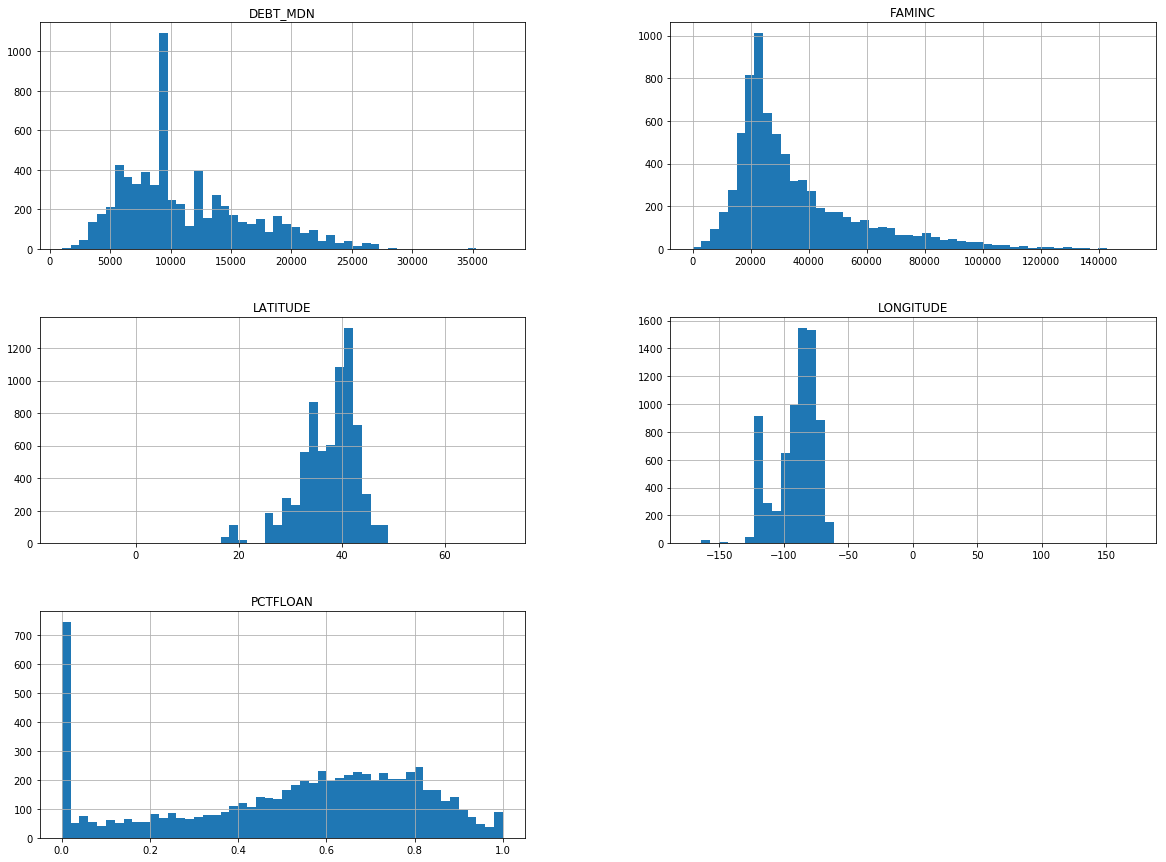

In [236]:
%matplotlib inline 
import matplotlib.pyplot as plt
college.hist(bins=50, figsize=(20,15))
plt.show()

Some findings from the histograms:
* `PCTFOLAN` has the highest frequency at the value of 0, which might indicate that some places do not offer the federal loan so there is a very high density at the value of 0. Because it is the dependent variable, more attention needs to be paid here. 
* `DEBT_MDN` with the value of 10,000 has the highest frequency, about 1,100 times.
* `FAMINC` has the right heavy tail. Most of the observations range from 20,000 to 30,000.
* Most observations are located with the value of `LATITUDE` from 35N to 40N and the value of `LONGITUDE` from -125W to -75W.

*Note*: **%matplotlib inline** can be used only in a Jupyter notebook. It allows Jupyter to create Matplotlib so that the Jupyter's own backend is available to be used. Additionally, **show()** is optional.

### *1.4 Create a train set and a test set*

Split the dataset into a train set train_set and a test set test_set. 80% of the data will be used as the training set (named `train_set`), and 20% used as the test set (named `test_set`). There are different approaches to split the data, as shown in the following part.

#### Method 1

* The function `split_train_test` is used to randomly select some observations from the whole dataset in order to create a test set. The function takes two inputs: the first being the dataset and the second being the ratio of the total number of observations of the entire dataset that we want to set aside as the test set. 


* `random.permutation(len())` method is used to randomly shuffle all the rows of the dataset. 

* `test-set-size` is an integer variable that represents the number of observations in the test set. 

* `test-indices` subsets the rows of the DataFrame until the row index `test_set_size`-1. 

* `train_indices` subsets the rows from the row index `test_set_size` till the end. 

This function returns two DataFrames - containing the train set rows and the test set rows.

In [237]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [238]:
train_set, test_set = split_train_test(college, 0.2)
print(len(train_set), "train +", len(test_set), "test")

6163 train + 1540 test


The output tells us that there are 6163 observations in the train set and 1540 observations in the test set.


#### Method 2 

However, the above method will give you a different test set each time you run it.

* In order to avoid it, we use each instance's identifier to decide whether the corresponding instance should be partitioned to the test set. 
* The function `test_set_check` computes a hash of each instance’s identifier, keep only the last byte of the hash and
put the instance in the test set if this value is lower or equal to 51 (~20% of 256). 
* This ensures that the test set will remain consistent across multiple runs.

In [239]:
import hashlib

def test_set_check(identifier, test_ratio, hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]

Since our college dataset does not have an identifier, we can use the row index as the id. To do this, we add the row index as a column.

In [240]:
college_with_id = college.reset_index()
train_set, test_set = split_train_test_by_id(college_with_id, 0.2, "index")

#### Method 3

This is another random-sampling method using Scikit-Learn. It is similar to the above `split_train_test` function, with additional features: split the datasets by passing the `random_state` parameter 

In [241]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(college, test_size=0.2, random_state=42)

## 2. Data discovery and visualisation

Create a copy of the training set to start exploring.

In [242]:
college = train_set.copy()

### *2.1 Scatter plot, box plot and histogram*

Use scatter plot to display the geographical information 

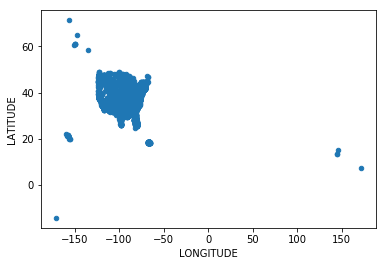

In [243]:
college.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

Most of the points clustered together depicting the institutions in the US (37° N, 95° W)

A few outliers are due to the following:

* Puerto Rico - 18° N, 66° W
* Virgin Islands - 18° N, 64° W
* Palau - 7.5150° N, 134.5825° E
* Federal States of Micronesia - 7° N, 150° E

Use boxplot to display the distribution of the variables *FAMINC* and *DEBT_MDN* in each *REGION*.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5EA91FFD0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5EA9E1860>], dtype=object)

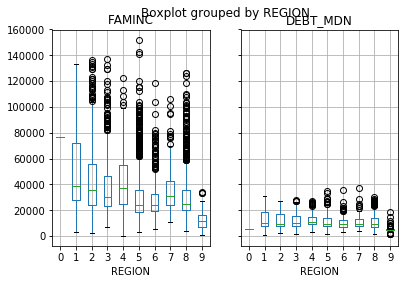

In [244]:
college.boxplot(column=["FAMINC","DEBT_MDN"], by="REGION")

The first figure dispays the boxplot for the average family income of students in each region. 

From the first plot we can observe that the average family income of students in (Region 9 - Outlying areas) is the lowest(~$10,000)  while  Region 1(New England) boasts of students coming from the highest median family income bracket (~$40,000).

The second plot shows the cumulative median debt of students in each region. Region 1(New England) again stands at the first position with the highest cumulative median debt of ~$10,000.

To plot the relationship between several variables, use a scatter plot again but with additional parameters for size and color of each point in the plot.


* `LATITUDE` and `LONGITUDE` represent the `x` and `y` coordinates of the point. 


* `s` denotes the size of each pont and `c` stands for the color of each point.


* The average family income of students (divided by 1000) is passed as a Pandas Series to the size parameter and percentage of students who receive a federal loan is passed to the color parameter. This implies that the size of the point would indicate the average family income and the color would represent the rate of receiving federal loan. 

*Note: The get_cmap() method recognizes any registered colormaps of `matplotlib` and retrieves it.*

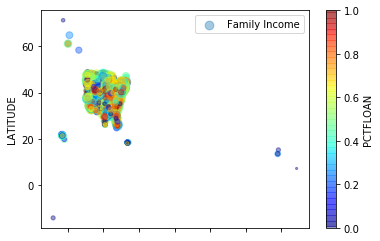

In [246]:
college.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.4,
    s=college["FAMINC"]/1000, label="Family Income",
    c="PCTFLOAN",cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

It can be seen that outlying regions have the least rate of receiving federal loan. Most institutions have a rate of around 0.6% of receiving federal loan.

### *2.2 Examine the correlation*

We use the `corr()` method to compute pairwise correlation of columns, excluding NA/null values.

In [247]:
corr_matrix = college.corr()

The output of the above code returns a DataFrame (`corr_matrix`) that contains all the pairwise correlation of columns.

We examine the correlation between our dependent variable `PCTFLOAN` and the independent variables using several methods.

**_Method 1_**: Calculate the correlations of each independent variable with the rate of receiving a federal loan (`PCTFOAN`), as shown below:

In [248]:
corr_matrix["PCTFLOAN"].sort_values(ascending=False)

PCTFLOAN     1.000000
DEBT_MDN     0.363228
LATITUDE     0.169326
FAMINC       0.128340
LONGITUDE    0.023185
Name: PCTFLOAN, dtype: float64

The output shows the correlation values sorted from highest to lowest. We can observe that `DEBT_MDN` has a weak positive correlation of 0.36.

**_Method 2_**: Plot the correlations between numerical variables by using `scatter_matrix` function from Pandas package:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5EB09D9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001E5EAA80080>]], dtype=object)

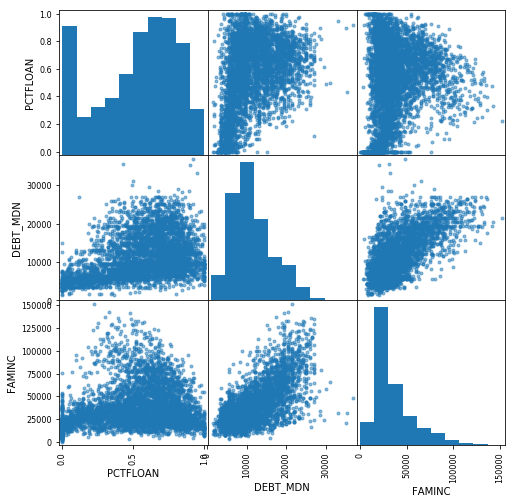

In [249]:
from pandas.tools.plotting import scatter_matrix

attributes = ["PCTFLOAN", "DEBT_MDN", "FAMINC"]
scatter_matrix(college[attributes], figsize=(8, 8))

There seems to be a strong postive correlation between the average family income of students (`FAMINC`) and the cumulative median debt of students(`DEBT_MDN`).

**_Method 3_**: Then we view the relationship between `PCTFLOAN` and `DEBT_MDN` using a scatter plot.

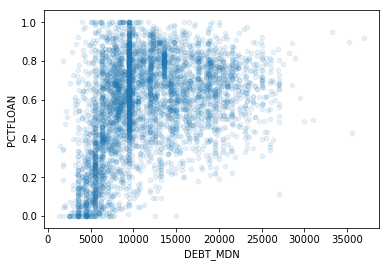

In [250]:
college.plot(kind="scatter", x="DEBT_MDN", y="PCTFLOAN",
             alpha=0.1)

The scatter plot tells us that `PCTFLOAN` and `DEBT_MDN` are postively correlated , but not strongly.

We now create a new copy of the `train_set` and separate the predictors and labels. The DataFrame `college` contains the predictors and the series `college_labels` consists of the variable `PCTFLOAN`. We confirm their dimensions.

In [251]:
college = train_set.drop("PCTFLOAN", axis=1)
college_labels = train_set["PCTFLOAN"].copy()
print(college.shape)
print(college_labels.shape)

(6162, 6)
(6162,)


## 3. Prepare the data for Machine Learning algorithms

### *3.1 Data Cleaning*

Most Machine Learning algorithms cannot work with missing features, so let's create a few functions to take care of them.We compute the median value on the training set and use it to fill the missing values in the training set.

*Notice*: Because we also have missing values in our dependent varible, we need to clean the train set entirely.

In [252]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attributes. In our case, the categorical variable `HIGHDEG` and `REGION` should be removed. 

In [253]:
college_num = college.drop("HIGHDEG", axis=1)
college_num = college.drop("REGION", axis=1)

Use **fit()** method to add `imputer` instance to the training data. <br>
The `Imputer` class helps to impute missing values, either using mean, median or the most frequent value of the row or column where missing values are located.

In [254]:
imputer.fit(train_set)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

Explanation for the following two steps of the imputer:
* Compute median of each variable 
* Store the medians in its *statistics_* instance variable

In [255]:
imputer.statistics_

array([  5.86450000e-01,   9.50000000e+03,   2.79107766e+04,
         2.00000000e+00,   5.00000000e+00,   3.88270850e+01,
        -8.63375020e+01])

In [256]:
train_set.median().values

array([  5.86450000e-01,   9.50000000e+03,   2.79107766e+04,
         2.00000000e+00,   5.00000000e+00,   3.88270850e+01,
        -8.63375020e+01])

Now, replace missing values by the computed medians in order to transform the training set:

In [257]:
X = imputer.transform(train_set)

Because the result is a Numpy array with transformed features. We can change the result to a Pandas DataFrame.

In [258]:
college_tr = pd.DataFrame(X, columns=train_set.columns)

Let's copy the traning set again so that the original training set is not affected, and then, separate the independent variables and labels so that we do not need to apply the same transformation to the independent variables and dependent variables. 

In [259]:
college = college_tr.drop("PCTFLOAN", axis=1)
college_labels = college_tr["PCTFLOAN"].copy()

### *3.2 Handling text and categorical attributes*

Since the variables HIGHDEG and REGION are categorical attributes, we cannot calculate their medians. Therefore, We can convert these text lables to numbers by using **LabelEncoder** for Machine Learning algorithm. 

Conversion for the variable **HIGHDEG**:

In [260]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
college_cat1 = college["REGION"]
college_cat1_encoded = encoder.fit_transform(college_cat1)
college_cat1_encoded

array([3, 1, 7, ..., 5, 5, 8], dtype=int64)

Take a look at the mapping that the encoder of variable **HIGHDEG** has applied by using the **classes_** attribute.

In [261]:
print(encoder.classes_)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


Conversion for the variable **REGION**:

In [262]:
college_cat2= college["HIGHDEG"]
college_cat2_encoded = encoder.fit_transform(college_cat2)
college_cat2_encoded

array([1, 3, 1, ..., 1, 0, 3], dtype=int64)

Take a look at the mapping that the encoder of variable **REGION**.

In [263]:
print(encoder.classes_)

[ 0.  1.  2.  3.  4.]


Use **OneHotEncoder** encoder to transform integer categorical values into one-hot vecters.
*Note*:reshape the housing_cat1_encoded and housing_cat2_encoded into 2D array since the **fit_transform()** requires a 2D array

In [264]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
college_cat1_1hot = encoder.fit_transform(college_cat1_encoded.reshape(-1,1))
college_cat1_1hot

<6162x10 sparse matrix of type '<class 'numpy.float64'>'
	with 6162 stored elements in Compressed Sparse Row format>

In [265]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
college_cat2_1hot = encoder.fit_transform(college_cat2_encoded.reshape(-1,1))
college_cat2_1hot

<6162x5 sparse matrix of type '<class 'numpy.float64'>'
	with 6162 stored elements in Compressed Sparse Row format>

The output is a `SciPy sparse matrix` with columns. For each row, the matrix has only one 1 and others are 0. This matrix stores only the location of non-zero elements in order to avoid wasting memory to store the great amount of zeros. <br>
Use **toarrary()** method to transform the sparse matrix to a Numpy array. 


In [266]:
college_cat1_1hot.toarray()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.]])

In [267]:
college_cat2_1hot.toarray()

array([[ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

The two transformations (from text categories to integer categories, and then from ineger categories to one-hot vectors) can be done in one step by using **LabelBinarizer** class, as shown below:

In [268]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
college_cat1_1hot = encoder.fit_transform(college_cat1)
college_cat1_1hot

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [269]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
college_cat2_1hot = encoder.fit_transform(college_cat2)
college_cat2_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

### * 3.4 Feature scaling*

With few exceptions, Machine Learning algorithms don't perform well when the input numerical attributes have very different scales.There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

### *3.5 Transformation Pipelines*

Scikit_Learn provides the Pipeline class to help with sequences of transformations.

In [270]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

college = num_pipeline.fit_transform(college)
college

array([[-0.31677442, -1.23387349, -0.91263209, -0.74241322,  0.70286914,
         0.47568867],
       [ 1.59809777,  2.81318477,  0.61677746, -1.6647419 ,  1.13686701,
         1.20561912],
       [ 0.18713932,  0.41886793, -0.91263209,  1.10224415,  0.39704428,
        -0.8885581 ],
       ..., 
       [-0.31677442, -0.87718482, -0.91263209,  0.17991546, -1.54229203,
         0.46544736],
       [ 0.18804636, -0.61278653, -1.67733686,  0.17991546,  0.23389457,
         0.22678471],
       [ 1.32759688, -0.47476959,  0.61677746,  1.56340849, -0.83118824,
        -1.61640004]])

## 4. Select and train a model

Let's first train a Linear Regression model. `college` is a numpy array and we need to convert college into pd.DataFrame to get the iloc function work.

In [271]:
college = pd.DataFrame(college)

### * 4.1 Training and evaluating on the training set*

In [272]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(college, college_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [273]:
some_data = college.iloc[:5]
some_labels = college_labels.iloc[:5]
some_data_prepared = num_pipeline.fit_transform(some_data)
print("Predictions:\t", lin_reg.predict(some_data_prepared))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 0.58838722  0.67669509  0.52930589  0.52147398  0.32854239]
Labels:		 [0.0, 0.20949999999999999, 0.434, 0.67400000000000004, 0.0088999999999999999]


It works, although the predictions are not exactly accurate. Let's measure this regression model's RMSE on the whole training set using Scikit_Learn's mean_squared_error functions.

In [274]:
import numpy as np
from sklearn.metrics import mean_squared_error
college_predictions = lin_reg.predict(college)
lin_mse = mean_squared_error(college_labels, college_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.24897494179336416

The PCTFLOAN ranges from 0 to 2, so a typical prediction error of 0.24897494179336416 is not very satisfying.

Let’s train a DecisionTreeRegressor: this is a powerful model, capable of finding
complex non-linear relationships in the data

In [275]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(college, college_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

Now the model is trained, let's evaluate it on the training set.

In [276]:
college_predictions = tree_reg.predict(college)
tree_mse = mean_squared_error(college_labels, college_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

1.8570287191493307e-05

The error term is really small. Could this model really be absolutely perfect? Of course it is much more likely that the model has badly overfit the data. we could fix that by using part of the training set for training, and part for model validation.

### *4.2 Cross Validation*

In order to evaluate the decision tree model, we use Scikit-Learn’s cross-validation feature. 
The following code performs K-fold cross-validation: it randomly splits the training set into 10 distinct
subsets called folds, then it trains and evaluates the decision tree model 10 times,
picking a different fold for evaluation every time and training on the other 9 folds.
The result is an array containing the 10 evaluation scores.

In [277]:
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(tree_reg, college, college_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

Let's look at the 10 rmse scores obtained using K-fold cross-validation.

In [278]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [ 0.25709636  0.23947745  0.26847932  0.25605639  0.23760829  0.23789983
  0.25829885  0.24785459  0.2391166   0.2587383 ]
Mean: 0.250062596992
Standard deviation: 0.0105235790513


Now the decision tree doesn’t look as good as it did earlier. In fact, it seems to perform
worse than the Linear Regression model!
Let’s compute the same scores for the Linear Regression model just to be sure.

In [279]:
lin_scores = cross_val_score(lin_reg, college, college_labels,
                             scoring="neg_mean_squared_error", cv=10)

lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [ 0.25274687  0.25036031  0.25334773  0.24702302  0.24972976  0.24726428
  0.24522771  0.24510862  0.25390658  0.24711803]
Mean: 0.24918329128
Standard deviation: 0.00314482762119


That’s right, the decision tree model is overfitting so badly that it performs worse than
the Linear Regression model.

Let’s try one last model now: the RandomForestRegressor.

In [280]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(college, college_labels)
forest_predictions = forest_reg.predict(college)
forest_mse = mean_squared_error(college_labels, forest_predictions)
forest_scores = cross_val_score(forest_reg, college, college_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores
display_scores(forest_rmse_scores)

Scores: [ 0.18327072  0.18884256  0.19993116  0.19750668  0.19383617  0.18553118
  0.19004277  0.19086243  0.19102369  0.20151509]
Mean: 0.192236244763
Standard deviation: 0.00566277909059


Wow, this is much better, Random Forests look very promising.

## 5. Fine tune the model 

### *5.1 Grid Search*

Scikit-Learn’s GridSearchCV evaluates all the possible combinations of hyperparameter values,
evaluating each combination using cross-validation, to then give us the best combination for the model.

In [281]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error')

grid_search.fit(college, college_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 5]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

We can get the best combination of parameters with the code below.

In [282]:
grid_search.best_params_

{'max_features': 3, 'n_estimators': 30}

The best estimator can also be obtained with the follwoing code.

In [283]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

The evaluation scores are also available.

In [284]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.214469281117 {'max_features': 2, 'n_estimators': 3}
0.194849894763 {'max_features': 2, 'n_estimators': 10}
0.187813002455 {'max_features': 2, 'n_estimators': 30}
0.213050037285 {'max_features': 3, 'n_estimators': 3}
0.192351703156 {'max_features': 3, 'n_estimators': 10}
0.186686251256 {'max_features': 3, 'n_estimators': 30}
0.21148367245 {'max_features': 4, 'n_estimators': 3}
0.19098588217 {'max_features': 4, 'n_estimators': 10}
0.187805534197 {'max_features': 4, 'n_estimators': 30}
0.213093389041 {'max_features': 5, 'n_estimators': 3}
0.193671090338 {'max_features': 5, 'n_estimators': 10}
0.187621527628 {'max_features': 5, 'n_estimators': 30}
0.212389229067 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.194750875782 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.211886210073 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.195861812681 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.214249867854 {'bootstrap': False, 'max_feature

The best solution is obtained by setting the max_features hyperparameter to 2, and the ` n_estimators` hyperparameter to 30. The RMSE score for this combination is 0.186078525852 , which is slightly better than the score you got earlier using the default hyperparameter values (which was 0.19203).

We can use the code below to indicate the relative importance of each attribute for making accurate predictions.

### *5.2 Analyze the best models and their errors*

We could gian good insights on the problem by inspecting the best models. For example, the `RandomFroestRegressor` can indicate the relative importance of each attribute for making accurate pridictions.

In [285]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([ 0.31532672,  0.22449801,  0.09061773,  0.0378071 ,  0.17304728,
        0.15870316])

We could display these importance socres next to their corresponding attribute names:

In [286]:
cat_one_hot_attribs = list(encoder.classes_)
num_attribs = list(college)
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31532671645391858, 0),
 (0.22449801291288701, 1),
 (0.17304728324639776, 4),
 (0.15870315776695526, 5),
 (0.090617732819349872, 2),
 (0.03780709680049147, 3)]

With the information, we may try to dropping some of the less useful features (eg. apparently `REGION` is not very useful).

### *5.3 Evaluate the final model on the test set*

Firstly we need to deal with missing values in the test set:

In [288]:
imputer.fit(test_set)
X = imputer.transform(test_set)
college_te = pd.DataFrame(X, columns=test_set.columns)
college_test = college_te.drop("PCTFLOAN", axis=1)
college_test_labels = college_te["PCTFLOAN"].copy()

In [295]:
final_model = grid_search.best_estimator_

college_test_prepared = num_pipeline.transform(X_test)

final_predictions = final_model.predict(college_test_prepared)

final_mse = mean_squared_error(college_test_labels, final_predictions)
final_rmse = np.sqrt(final_mse) 
final_rmse

0.24774289291564711

The end